Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Dataset for Problem 1: bank_marketing_part1_Data.csv

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
advance_payments: Amount paid by the customer in advance by cash (in 100s)
probability_of_full_payment: Probability of payment done in full by the customer to the bank
current_balance: Balance amount left in the account to make purchases (in 1000s)
credit_limit: Limit of the amount in credit card (10000s)
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

Exploratory Data Analysis

Install the necessary packages and invoke the libraries.

Import & Read the data:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/smita/Downloads/bank_marketing_part1_Data.csv")

In [3]:
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


Summary Of data : We can see the summary of data using describe(),we find the measures of central tendency ,mean ,median,max andquartile values. shows seven individual columns. if we look at the value of mean ,min,and max of all variables in the data,it is clearly seen that they seems to be close enough to each other.

In [4]:
# Number Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


Variable Identification: Problem has 210 rows and 7 columns .

In [5]:
# Data inspection
df.shape

(210, 7)

In [6]:
# Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.spending.value_counts()

11.23    3
15.38    3
14.11    3
17.63    2
12.19    2
        ..
14.09    1
12.72    1
13.89    1
12.36    1
18.75    1
Name: spending, Length: 193, dtype: int64

Missing Value Treatments :

In [8]:
# Checking for missing values
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
# Identify the duplicates 
df.duplicated().sum()

0

In [10]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

<AxesSubplot:>

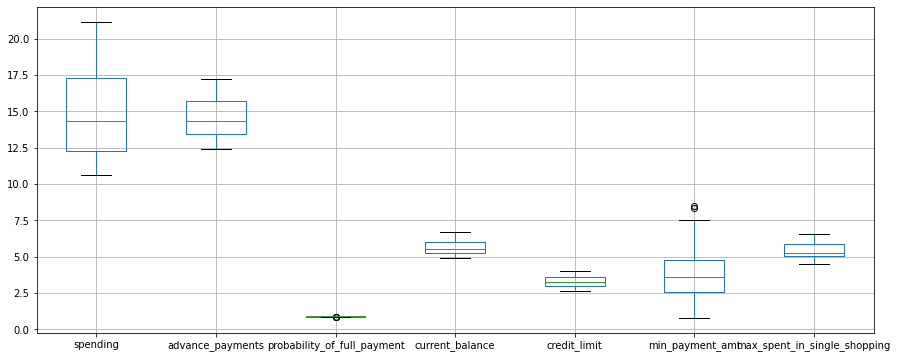

In [11]:
plt.figure(figsize=(15,6))
df.boxplot()

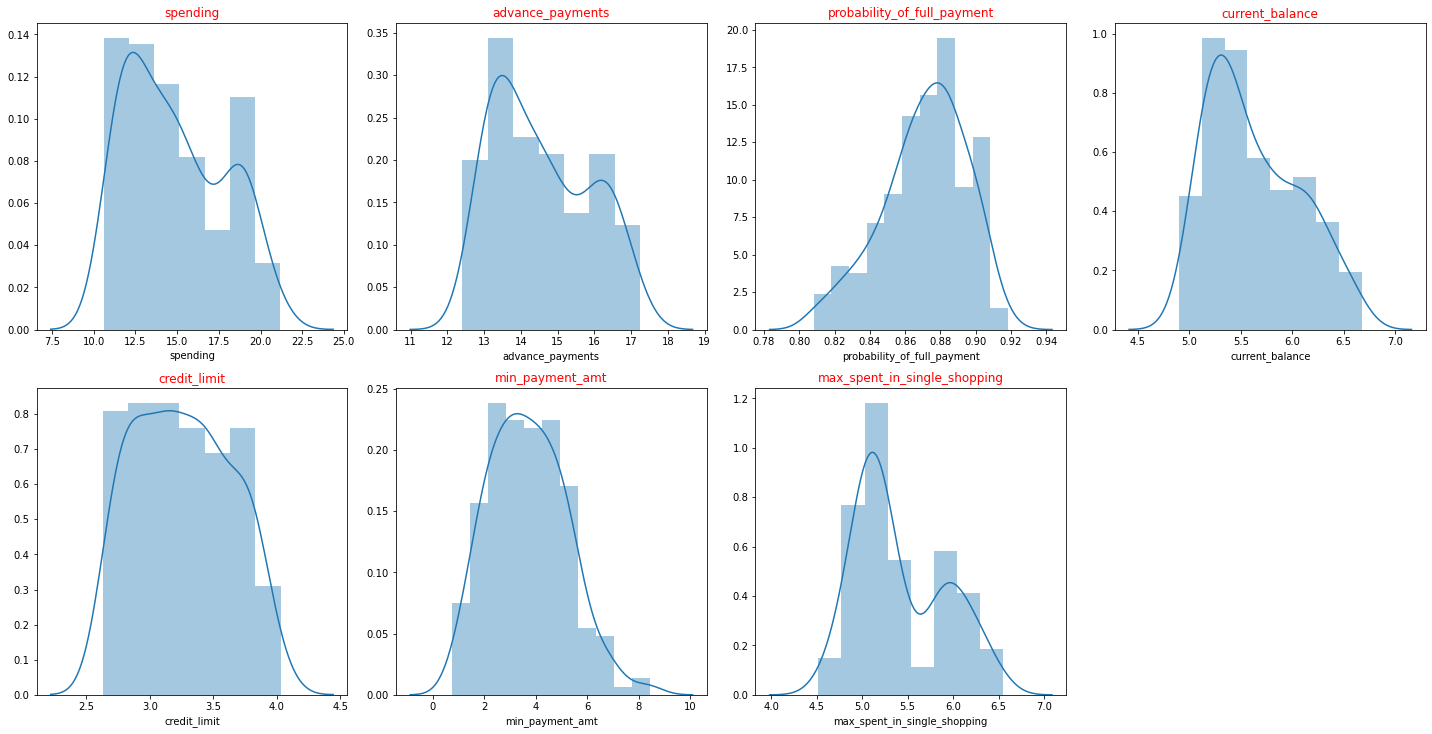

In [12]:
# Distribution Plots 
data_plot=df
fig=plt.figure(figsize=(20,20))
for i in range (0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.show()

In [13]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [14]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

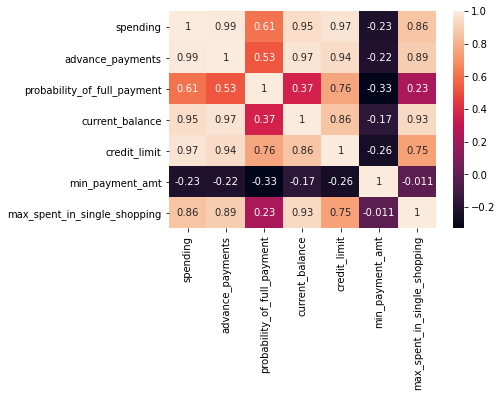

In [15]:
sns.heatmap(df.corr(),annot=True)

Based on the Heatmap we can infer that the spending are highly positively correlated with advance_payment(.99%) ,credit_limit
(.97%),current_balance(.95%),max_spent_in_single_shopping(.86%).
While spending of customer is negatively correleated with min_payment amount.



# Is scaling is necessary for clustering ?

Normalization is used to eliminate redundate data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms. So it becomes an essential step before clustering as Euclidiean distance is very sensitive to the changes in the differences all dimensions are equally important. However ,in this market segmentation data has various dimension's like spending . Amount spend by the customer per month in 1000s. advance _payments :Amount paid by the customer in advance by cashin 100s. The probability _of_full payment:Probability of payment in fill by customer to the bank. current_balance :Balance zmount left in the account to make purchase in 1000s credit_liit:Limitof the amount in credt card 10000s. min_payment _amt:minimum paid by customer while making payments for purchases made monthly in 100s. max_spent_in_single_shopping :Maximum amount spent in one purchase in 1000s .

Scaling the data

In [16]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [17]:
# Creating an object for the StandardScaler function
X=StandardScaler()

In [18]:
scaled_df = X.fit_transform(df)

In [19]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

Now that we have scaled the data. Let us create a dataframe out of this scaled variables for clustering.

In [20]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)

In [21]:
scaled_df.head(6)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274


In [22]:
from scipy.stats import zscore 
scaled_df = df.apply(zscore)
scaled_df.head(6)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274


From sklearn-prepocesing we import StandardScaler function as function to perform the scaling of dataset. This function uses Z-scaling method to standardise the data.

#  Hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them 

We apply here hierarchical clustering which is an algorithm that groups similar objects into groups called clusters.The enpoint is a set of clusters ,where each cluster is distinct from each orther cluster . object within each cluster are similar to each other . From scipt.cluster.hierarchy we import dendrogram,linkage which is used to identify the optimal number of clusters. We perform hierarchial clustering on the scaled data and following ressults is obtained. Wardlink method is used to obtain this.Two clusters of Green and Red are obtained through the dendrogram . We find that the maximum numbe of details /custoner fall under the red cluster.

Creating the Dendrogram Importing dendrogram and linkage module

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
# HClust=wardlink=linkage(df,method='ward')

In [25]:
# Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.

HClust = linkage(scaled_df, method = 'ward')


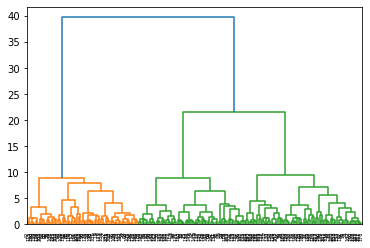

In [26]:
# Visualize Dendrogram
dend = dendrogram(HClust)

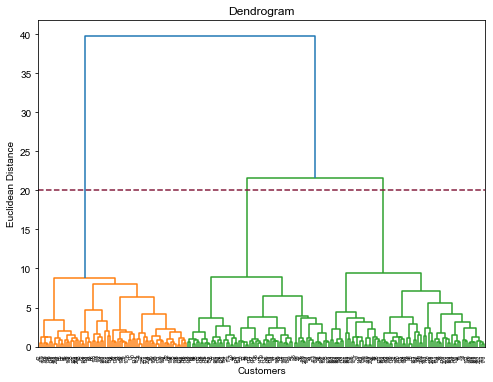

In [27]:
# Now using the dendrogram to find optimal number of clusters
dend = dendrogram(HClust)
plt.axhline(y=20, color='#851e3e', linestyle='--')
fig=plt.gcf()
fig.set_size_inches(8,6)
sns.set_style('darkgrid')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# In the above plot,the longest vertical line is at y-axis=20, so drawing a line perpendicular to get the number of clusters,here it is intersecting at 3 points..(n_clusters=3)


Since clustering unsupervised learning after using distance matrix and plotting the dendrogram we can see 3 cluster would be optimal cluster

In [28]:
# dendrogram(HClust)

Cutting the Dendrogram with suitable clusters.To get a neater output of dendrogram ,we use Truncate function with the value of P as 10

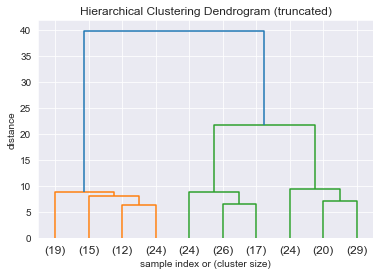

In [29]:
# dend=dendrogram(link_method,truncate_mode='lastp',p=10)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dend = dendrogram(HClust,truncate_mode='lastp',p=10)
               
                

 Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe

Importing fcluster module to create clusters

In [30]:
from scipy.cluster.hierarchy import fcluster

In [31]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters=fcluster(HClust,3,criterion ='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

Appending clusters to original dataset

In [32]:
# DF['H_clusters'] = clusters

In [33]:
df['H_clusters'] = clusters


In [34]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [35]:
# Cluster frequency
df['H_clusters'].value_counts().sort_index()


1    70
2    67
3    73
Name: H_clusters, dtype: int64

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
# Set n_clusters=3,affinity='euclidean', linkage='ward' and store the result in another object 'Cluster_agglo'

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df.iloc[:,1:9])
print(Cluster_agglo)

[0 2 0 1 0 1 1 2 0 1 0 1 2 0 2 1 2 1 1 2 1 1 0 2 2 0 2 1 1 1 2 2 1 2 1 1 1
 1 1 0 0 2 0 0 1 1 2 0 0 0 2 0 0 0 0 0 1 1 1 0 2 1 1 1 2 0 0 2 0 2 2 1 0 0
 1 0 2 1 0 2 2 2 2 0 1 1 2 0 0 1 1 0 2 2 2 0 0 0 1 0 1 0 2 0 2 0 0 1 1 0 2
 2 0 1 1 0 2 1 1 0 2 1 1 2 2 2 0 1 2 2 1 2 2 0 1 0 0 1 0 1 1 2 2 2 2 1 0 1
 2 1 2 1 2 2 2 2 2 1 2 0 0 1 0 0 0 1 0 2 2 2 2 1 2 0 0 0 2 2 0 1 2 2 2 2 0
 0 2 2 2 1 2 1 1 0 2 0 0 1 0 1 2 0 2 1 0 1 0 2 0 2]


In [38]:

print(cluster.labels_)

[0 2 0 1 0 1 1 2 0 1 0 1 2 0 2 1 2 1 1 2 1 1 0 2 2 0 2 1 1 1 2 2 1 2 1 1 1
 1 1 0 0 2 0 0 1 1 2 0 0 0 2 0 0 0 0 0 1 1 1 0 2 1 1 1 2 0 0 2 0 2 2 1 0 0
 1 0 2 1 0 2 2 2 2 0 1 1 2 0 0 1 1 0 2 2 2 0 0 0 1 0 1 0 2 0 2 0 0 1 1 0 2
 2 0 1 1 0 2 1 1 0 2 1 1 2 2 2 0 1 2 2 1 2 2 0 1 0 0 1 0 1 1 2 2 2 2 1 0 1
 2 1 2 1 2 2 2 2 2 1 2 0 0 1 0 0 0 1 0 2 2 2 2 1 2 0 0 0 2 2 0 1 2 2 2 2 0
 0 2 2 2 1 2 1 1 0 2 0 0 1 0 1 2 0 2 1 0 1 0 2 0 2]


In [39]:
# plt.figure(figsize=(10, 7))
# plt.scatter(data[:,0],data[:,1], c=cluster.labels_, cmap='rainbow')

You can see the data points in the form of three clusters.

Similarly, the customers at top right (blue data points)belong to 1st cluster, these are the customer with highest spending , advance payment and probability of full payment. These are the type of customers that companies should target to increase the business revenue. The customers in the middle (red data points)belongs to cluster 3 are with second highest spending,advance payment and probability of full payment amongs the all three clusters.

The data points in the bottom green dot belong to the cluster 2 the ones with least spending ,advance payment and probability of full payments.

Appending clusters to original dataset

In [40]:
df["Agglo_CLusters"]=Cluster_agglo

In [41]:
# Agglomerative Cluster Frequency
df.Agglo_CLusters.value_counts().sort_index()

0    70
1    66
2    74
Name: Agglo_CLusters, dtype: int64

In [42]:
# Agglomeraive Cluster Profiles

In [43]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index(ascending=True)
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Freq
Agglo_CLusters,,,,,,,,,
0,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.000000,70
1,12.228333,13.408333,0.852586,5.276242,2.908106,5.153955,5.110379,2.151515,66
2,13.850135,14.085405,0.874743,5.441730,3.168216,2.461354,5.097216,2.851351,74


According to business prospective we can target cluster 1 people more and give some attractive offer to get improve the revenues followed by cluster 3 and cluster 2 respectively.

In [44]:
df.to_csv('H_Cluster.csv')

In [45]:
# The K-Means clustering with 2,3 ,4 clusters and find out the within cluster sum of squares.

# Within Sum of Squares (WSS) for 2 to 15 clusters

# k-mean Modelling ,Choose k-number ,Silhouette Analysis

In [46]:
from sklearn.cluster import KMeans

In [47]:
# Perform the K-Means clustering with 3 clusters and find out the within cluster sum of squares.
k_means3=KMeans(n_clusters=3,random_state=1)
k_means3.fit(scaled_df)
k_means3.labels_


array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [48]:
k_means3.cluster_centers_

array([[-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311],
       [-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856],
       [ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787]])

In [49]:
k_means3.inertia_

430.6589731513006

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
silhouette_score(scaled_df,k_means3.labels_)

0.4007270552751299

In [52]:
silhouette_samples(scaled_df,k_means3.labels_).min()

0.002713089347678533

In [53]:
# Perform the K-Means clustering with 2clusters and find out the within cluster sum of squares.
k_means2=KMeans(n_clusters=2,random_state=1)
k_means2.fit(scaled_df)
k_means2.labels_


array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [54]:
k_means2.inertia_

659.171754487041

In [55]:
silhouette_score(scaled_df,k_means2.labels_)

0.46577247686580914

In [56]:
silhouette_samples(scaled_df,k_means2.labels_).min()

-0.006171238927461077

In [57]:
# Perform the K-Means clustering with 4 clusters and find out the within cluster sum of squares.
k_means4=KMeans(n_clusters=4,random_state=1)
k_means4.fit(scaled_df)
k_means4.labels_


array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

In [58]:
k_means4.inertia_

371.38509060801096

In [59]:
silhouette_score(scaled_df,k_means4.labels_)

0.3276547677266193

In [60]:
silhouette_samples(scaled_df,k_means4.labels_).min()

-0.05384082699360047

The silhouette score analysis shows that the cluster 2 has the highest score(0.466) and sihoutte sample width of cluster 3 (0.00271)is a positive value as compared to the cluster 2 and cluster 4 .
We will go by cluster 3 for kmean algorithm and from business point of you also proper cluster profiling is done in case of 3 clusters.


Modelling
Choose k-number
Silhouette Analysis

In [61]:
from sklearn.metrics import silhouette_score

ssw = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(scaled_df)
    ssw.append([k, silhouette_score(scaled_df, kmeans.labels_)])

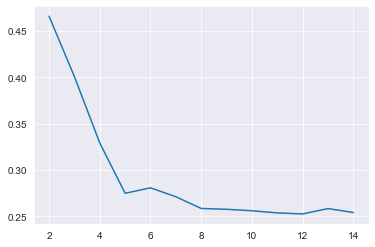

In [62]:
# Plot Silhouette Scores
plt.plot(pd.DataFrame(ssw)[0], pd.DataFrame(ssw)[1]);

As per the sihouette score plot we can see 2nd cluster shows the highest silhouette score amongs the all.

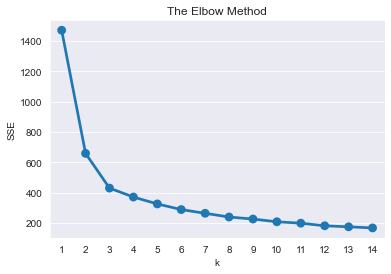

In [63]:
from sklearn.cluster import KMeans

ssw = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    ssw[k] = kmeans.inertia_  # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(ssw.keys()), y=list(ssw.values()))
plt.show()

The elbow plot shows the drop is steep till 3rd cluster after that it becomes linear .So elbow method suggest the optimum cluster should be 3.

In [64]:
ssw

{1: 1469.9999999999998,
 2: 659.171754487041,
 3: 430.6589731513006,
 4: 371.65314399951626,
 5: 326.36760226583755,
 6: 289.215290274911,
 7: 264.7028136283619,
 8: 240.16169190327855,
 9: 226.80504246225567,
 10: 208.85822376096527,
 11: 199.61868729278214,
 12: 182.55668590984857,
 13: 175.62293211789577,
 14: 168.40772820911505}

In [65]:
# KMeans with 3 Clusters
model = KMeans(n_clusters=3, random_state=1)
model.fit(scaled_df)


KMeans(n_clusters=3, random_state=1)

In [66]:
df["Clus_kmeans4"] = model.labels_
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Agglo_CLusters,Clus_kmeans4
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,2


In [67]:
# K-means cluster profile frequency
df.Clus_kmeans4.value_counts().sort_index()

0    71
1    72
2    67
Name: Clus_kmeans4, dtype: int64

In [68]:
clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Agglo_CLusters,freq
Clus_kmeans4,,,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,1.746479,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,1.222222,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.029851,67


In [69]:
# Check Cluster Profiles for K-Means Algorithm
df.groupby('Clus_kmeans4').agg({
    'spending':'mean','advance_payments':'mean',
    'probability_of_full_payment':'mean',
    'current_balance':'mean','credit_limit':'mean','min_payment_amt':'mean','max_spent_in_single_shopping':'mean'}).round(1)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Clus_kmeans4,,,,,,,
0,14.4,14.3,0.9,5.5,3.3,2.7,5.1
1,11.9,13.2,0.8,5.2,2.8,4.7,5.1
2,18.5,16.2,0.9,6.2,3.7,3.6,6.0


In [ ]:
# Cluster profiles for the clusters defined. Recommend different promotional strategies for different 
# clusters in context to the business problem in-hand.

Cluster Profiling

K means clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.

Cluster0: People with a more spending,more advance payments ,good  credit_limit and the frequency is also good.
Cluster1: People with a less pending ,less advance payments and low credit limit, but with highest frequency. 
Cluster2: People with highest spending,highest advance payments and good credit limit has spent maximum in single shoping,
but shows the lowest frequency comparative to Cluster 0 and Cluster 1 people.  

Different Promotional strategies for different clutsers in context to the business problem in hand are given below:

1.In hierarchial clustering each group of cluster shows indifferent other variable to first group of cluster similarly second and the third group. As we run the silhouette function,we can observe each cluster size and average sihouette and each cluster not overlapped . And also ,we can observe ,cluster1 closest neighbor 2 cluster and 2 cluster neighbor 3 cluster. By using Hierarchial clustering ,we can say cluster 1 group of people spending more and they do usually more advance payment , probability of full payment is higher compare to 3 group cluster .

2.According business prospective we can target cluster 1 people give attractive offer as followers cluster 2 and cluster 3.

3.K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. The k-means algorithms identifies k number of centroids ,and then allocates every data point to nearest cluster as we can see this problem statement just like hierarchial clustering group 1 people are spending more money advance payment as well compare to other cluster.

Cluster Profiling

Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Dataset for Problem 2: insurance_part2_data-1.csv

Attribute Information:

Target: Claim Status (Claimed)
Code of tour firm (Agency_Code)
Type of tour insurance firms (Type)
Distribution channel of tour insurance agencies (Channel)
Name of the tour insurance products (Product)
Duration of the tour (Duration)
Destination of the tour (Destination)
Amount of sales of tour insurance policies (Sales)
The commission received for tour insurance firm (Commission)
Age of insured (Age)

In [2]:
# Data Ingestion & descriptive statistics ,do null value condition check of data.
# Interpret the inferences from the descriptive statistics in a detailed manner.
  

Data Importing & Cleaning

In [70]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [71]:
df=pd.read_csv("insurance_part2_data.csv")

In [72]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [73]:
df.shape

(3000, 10)

As we see the datasets has 3000 observations of 10 variables.

In [74]:
# df1=df.drop(["Agency_Code"],axis=1) 

As we see the datasets has 3000 observations of 10 variables.

In [75]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Data contains no missing value .

In [76]:
# df.describe(include="all")

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


Statistical summary of the imported dataset using pandas.describe() method.
In data if since the mostly mean value is greater than median.We can say the data is highly positively right skewed .
Among all the variable duration shows the highest positive right skewness of 13.7.


In [78]:
df.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

Check the data types:

In [79]:
df.dtypes.value_counts()

object     6
int64      2
float64    2
dtype: int64

The dat contains 6 objects which needs to converted to ordinal type.

Decision tree in Python can take only numerical / categorical columns. It cannot take string / object types.

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


The summary of data set shows total 3000 entries  with total 10 columns with integers ,floats and object dtypes.We can see no null values are present in data .

In [81]:
df.duplicated().sum()

139

Data contains 139 duplicated value which is removed using duplicated ().

In [82]:
df.drop_duplicates(inplace=True) 

In [83]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


Now the dataset show zero duplicated values.

The following code loops through each column and checks if the column type is object then converts those columns
into categorical with each distinct value becoming a category or code.

In [84]:
# Label Encoding has been done and all object columns are converted to number.

for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [85]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [87]:
df['Duration'].describe()

count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64

In [88]:
df['Age'].describe()


count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64

Now we can see the summary shows no object datatype.

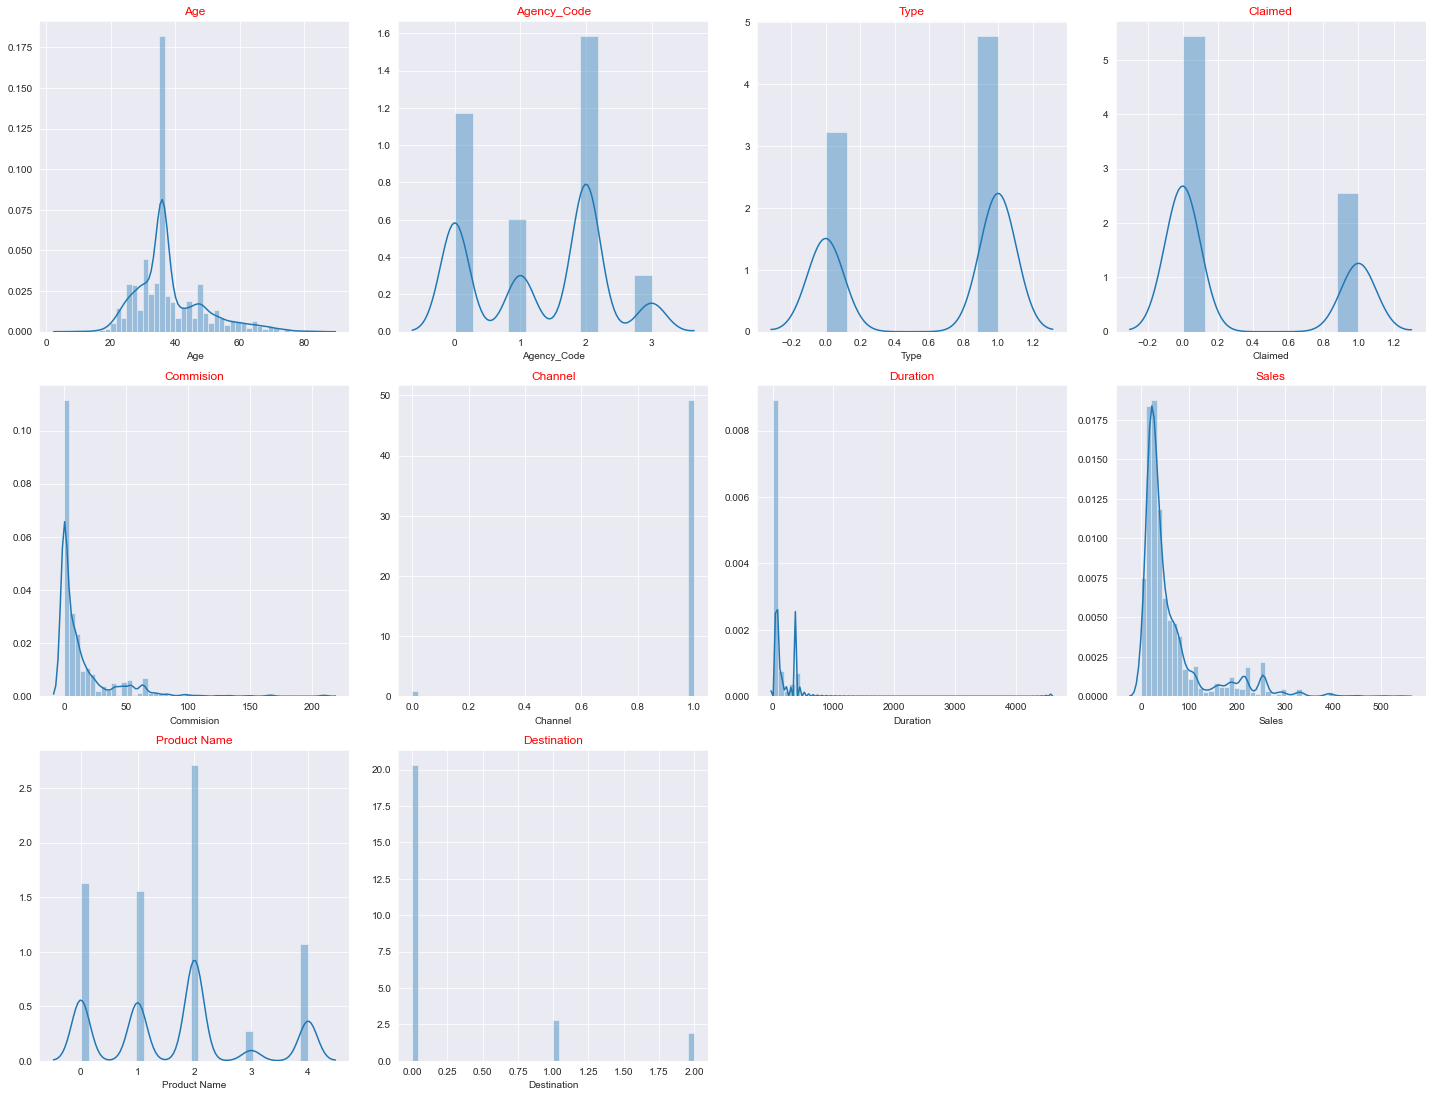

In [89]:
data_plot=df
fig=plt.figure(figsize=(20,20))
for i in range (0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.show()
# hist=True we get both histogram and distplot but when hist=False we get only distplots



From the graph we can conclude:

Duration: Data in this column is highly right skewed.

Net Sales and Commison: These both column seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.

Age: Age is random so its distribution can be random.The age of travel insurer is mostly close to 40 years and very few are 100 years old.


In [90]:
df['Duration'].describe()

count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64

In [91]:
df.groupby(["Type"]).mean()

,Age,Agency_Code,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Type,,,,,,,,,
0,38.796007,0.622396,0.505208,21.312648,1.000000,102.430556,82.328750,1.670139,0.020833
1,37.805149,1.724400,0.194266,10.880374,0.973084,51.688707,47.891498,1.664131,0.424225


In [92]:


df.groupby(['Type']).mean()



,Age,Agency_Code,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Type,,,,,,,,,
0,38.796007,0.622396,0.505208,21.312648,1.000000,102.430556,82.328750,1.670139,0.020833
1,37.805149,1.724400,0.194266,10.880374,0.973084,51.688707,47.891498,1.664131,0.424225


In [93]:
df.groupby(['Channel']).mean()

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
Channel,,,,,,,,,
0,43.869565,1.130435,1.000000,0.369565,7.676957,90.826087,39.043478,2.043478,0.086957
1,38.111545,1.283126,0.590764,0.318650,15.201986,71.814565,62.129055,1.660391,0.264654


In [94]:
df[df["Duration"] <0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,3,0,0,6.3,1,-1,18.0,0,0


In [96]:
claimeddata = df[df["Claimed"]==1]

<AxesSubplot:>

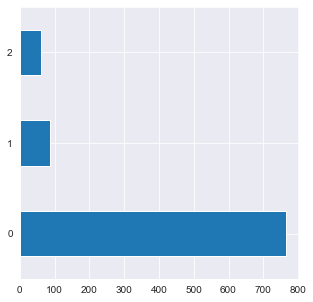

In [97]:
claimeddata['Destination'].value_counts().head(10).plot(kind='barh', figsize=(5,5))

In [98]:
a = pd.DataFrame(df.loc[:, "Product Name"].value_counts())
b = pd.DataFrame(claimeddata.loc[:, "Product Name"].value_counts())
combined = a.join(b, lsuffix = "_general", rsuffix = "_claimed")
combined.fillna(0, inplace = True)
combined

,Product Name_general,Product Name_claimed
2,1071,253
0,645,249
1,615,42
4,421,300
3,109,70


<AxesSubplot:>

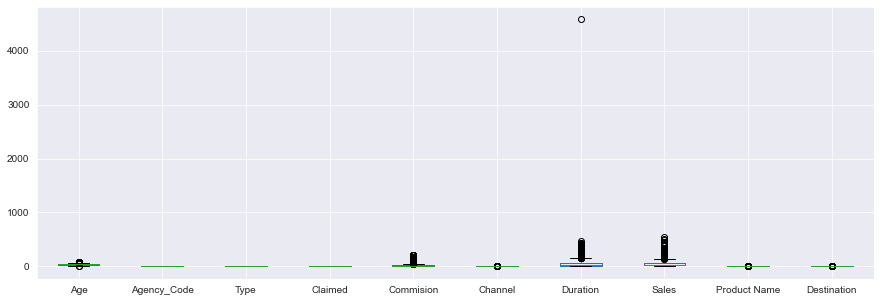

In [99]:
plt.figure(figsize=(15,5))
df.boxplot()

There are more outliers in the variables like age,commision,duration and sales variables.Few outliers can be seen in agency code ,channel ,product name and channe; variable too.
Random Forest and ANN can handle the outliers.
However we will do imputations in case of outliers and compare the model performances.

<Figure size 288x360 with 0 Axes>

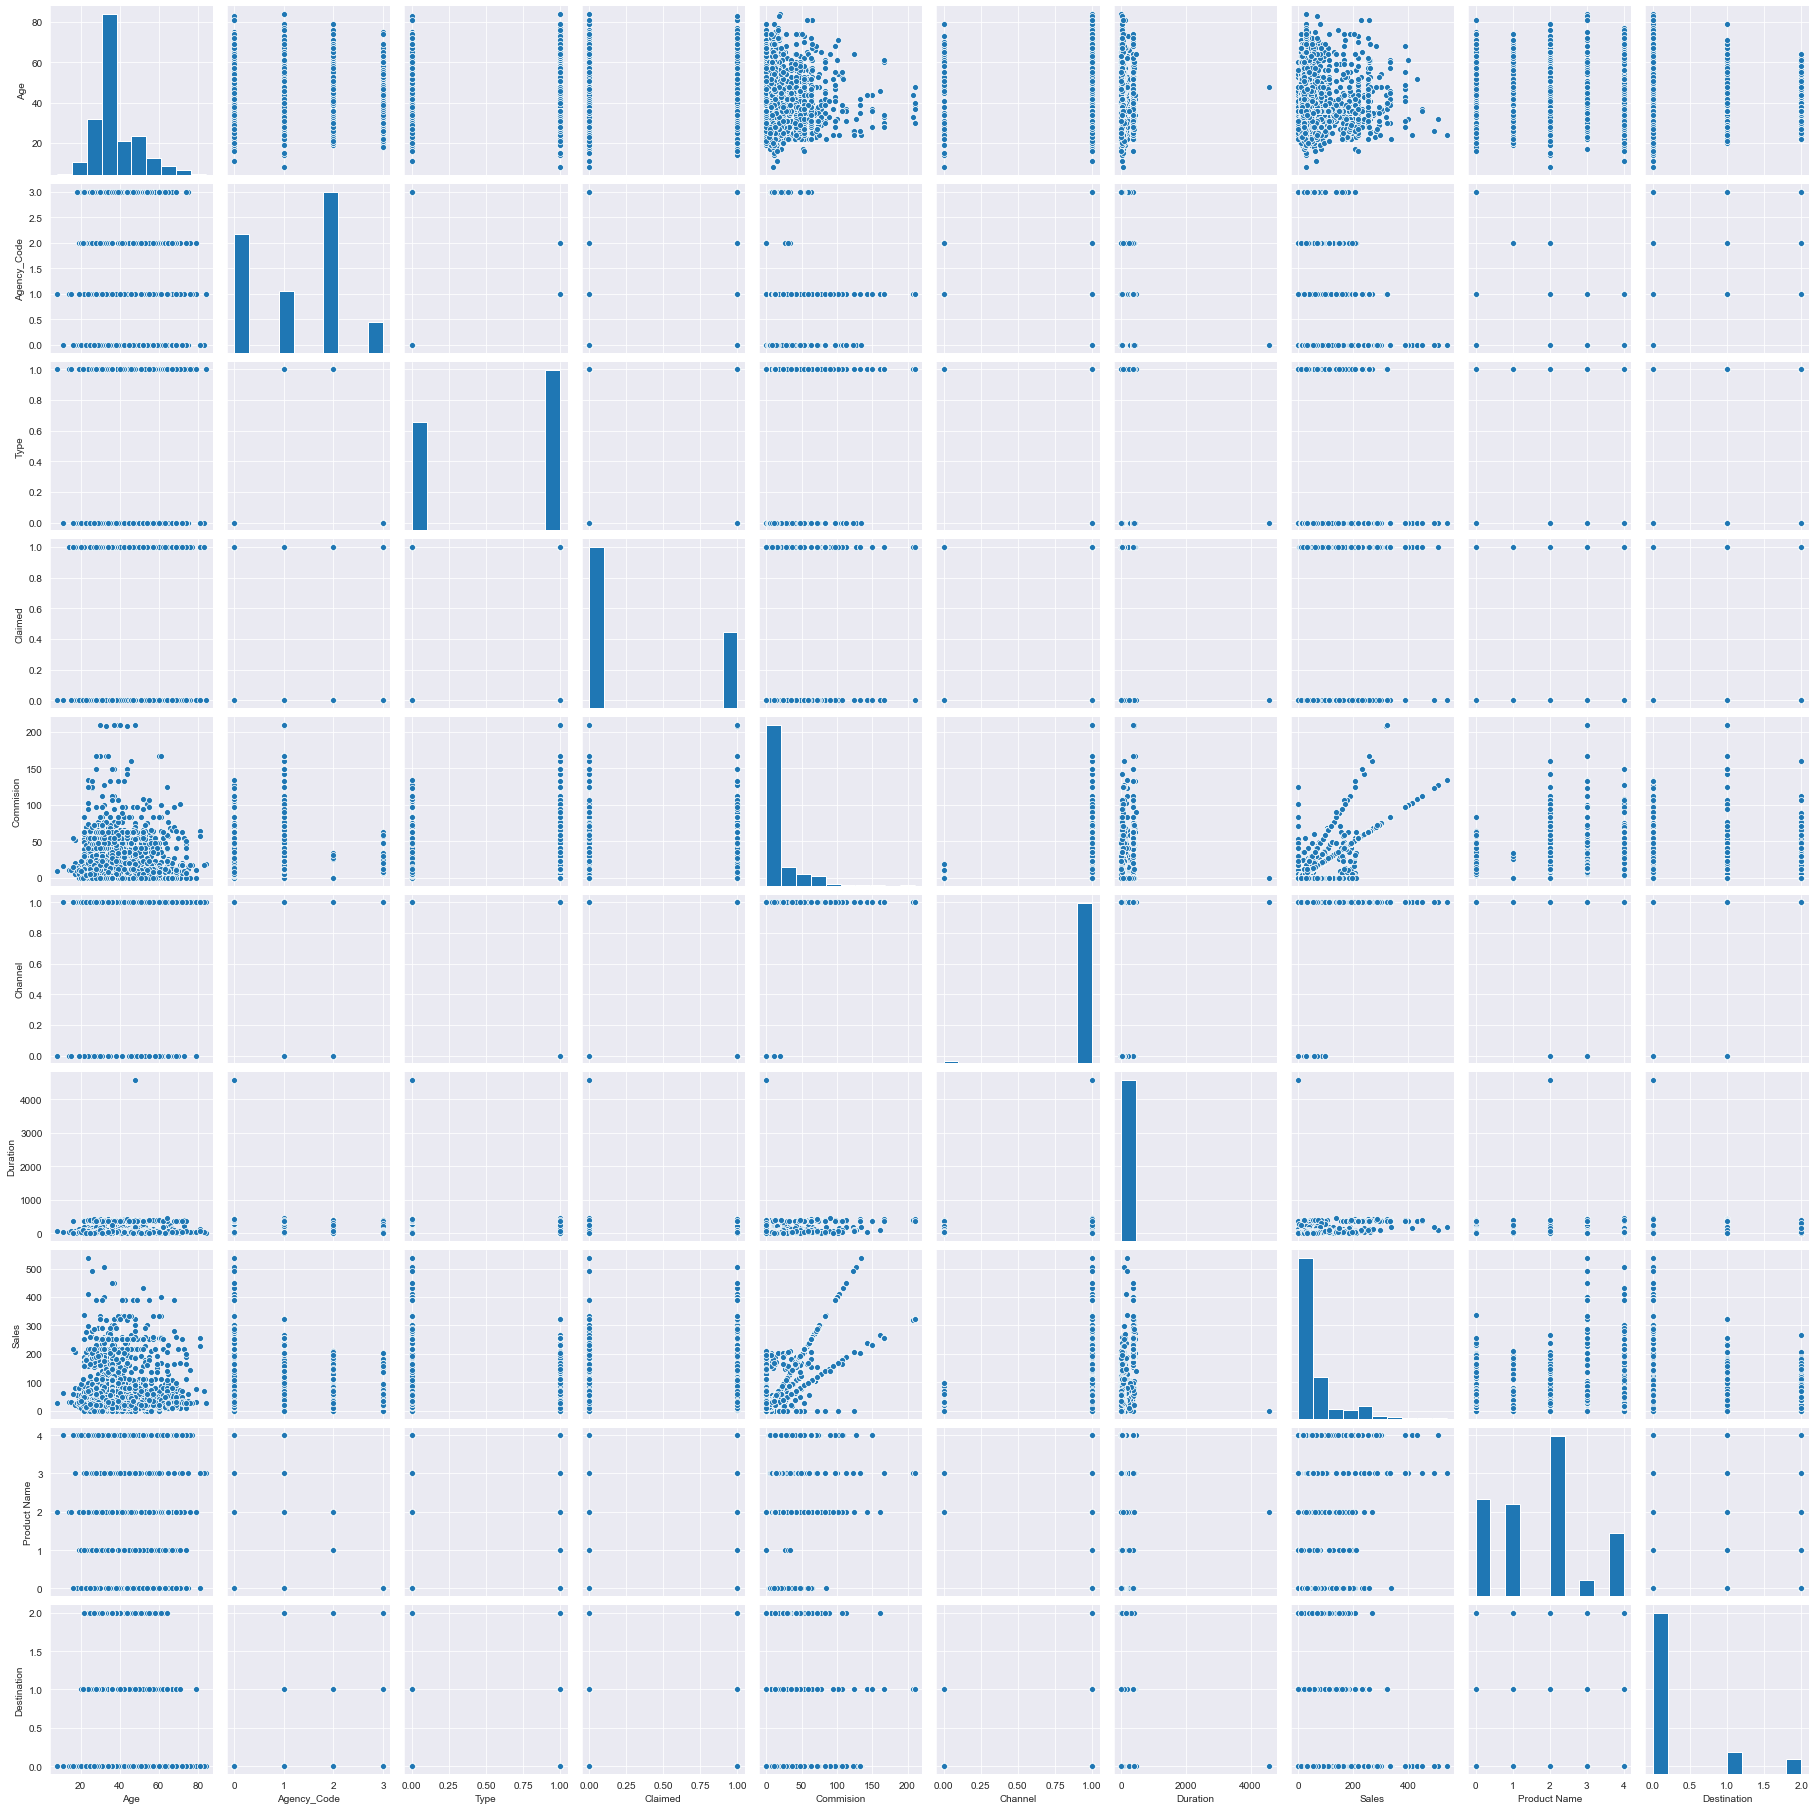

In [100]:
plt.figure(figsize=(4,5))
sns.pairplot(df)

<AxesSubplot:>

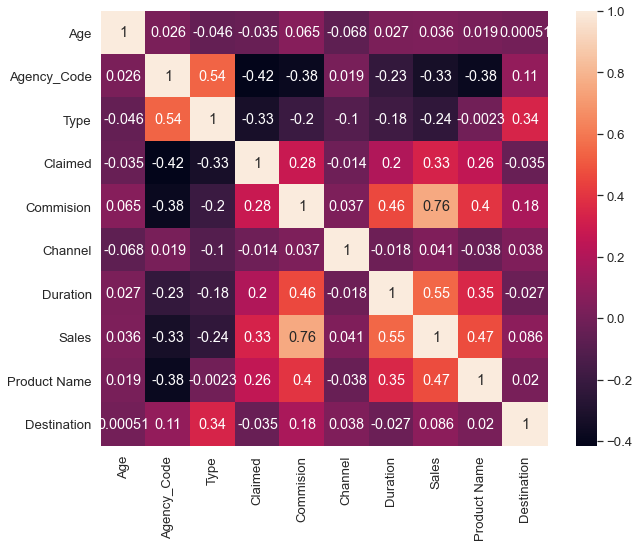

In [101]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot=True)



The commision variable is highly positively correlated with sales variable(correlation of 0.76).
Overall,the magnitude of correlations between the variables are very less.
The Agency_Code,Type ,channel and Destination are negatively correlated with the target variable (claimed).
Rest Commision ,Duration,Sales and product name are positively correlated with the target variable(claimed) .
Overall,we can say less correlation among the variable is seen in data .


Proportion of observations in Target classes

In [102]:
# Check the % of 0s and 1s in Target Variable Class
# df['Claimed'].value_counts(normalize = True)
print("Percentage of 0's",round(df.Claimed.value_counts().values[0]/df.Claimed.count()*100,2),'%')
print("Percentage of 1's",round(df.Claimed.value_counts().values[1]/df.Claimed.count()*100,2),'%')

Percentage of 0's 68.05 %
Percentage of 1's 31.95 %


The data is highly imbalanced with 68% of claimed and 32% of not claimed proportions.

EDA
Check Class Counts (0s and 1s) in Target Variable

In [103]:
print(df.Claimed.value_counts())

0    1947
1     914
Name: Claimed, dtype: int64


In [104]:
print(df.Claimed.value_counts())
print('%1s',1947/(1947+914))
print('%0s',914/(1947+914))

0    1947
1     914
Name: Claimed, dtype: int64
%1s 0.6805312827682628
%0s 0.31946871723173714




There is no issue of class imbalance here as we have reasonable proportions in both the classes


<AxesSubplot:>

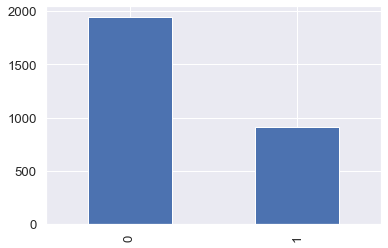

In [105]:
df['Claimed'].value_counts().plot(kind='bar')

Imputation of Data : As outliers are present in the data we will do impute the outliers with medians() and categorical varaible are imputed with mode().

<AxesSubplot:xlabel='Age'>

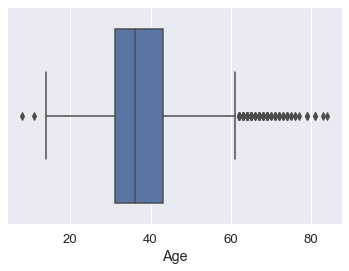

In [106]:
sns.boxplot(df['Age'])

As Outliers are present in the "Age", so we impute the null values by median

In [107]:
df['Age'] = df['Age'].fillna(df['Age'].median())

<AxesSubplot:xlabel='Commision'>

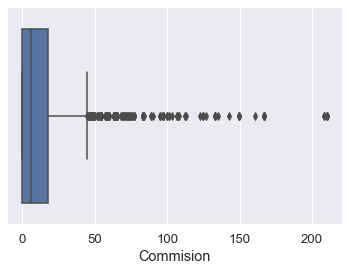

In [108]:
sns.boxplot(df['Commision'])

In [109]:
df['Commision'] = df['Commision'].fillna(df['Commision'].median())

<AxesSubplot:xlabel='Commision'>

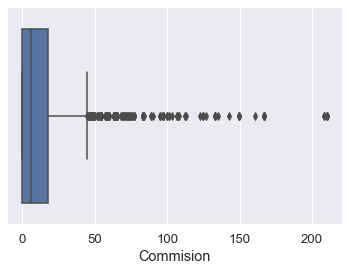

In [110]:
sns.boxplot(df['Commision'])

In [111]:
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

<AxesSubplot:xlabel='Sales'>

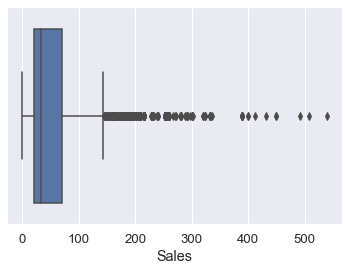

In [112]:
sns.boxplot(df['Sales'])

In [113]:
df['Destination'] = df['Destination'].fillna(df['Destination'].median())

<AxesSubplot:xlabel='Destination'>

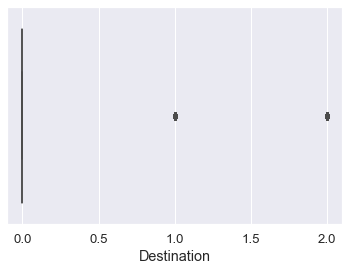

In [114]:
sns.boxplot(df['Destination'])

In [115]:
df['Channel'] = df['Channel'].fillna(df['Channel'].median())

<AxesSubplot:xlabel='Channel'>

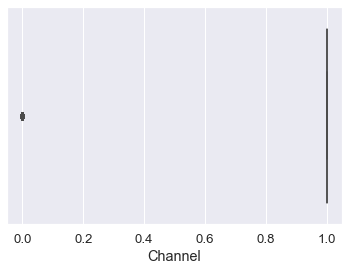

In [116]:
sns.boxplot(df['Channel'])

In [117]:
df['Product Name'] = df['Product Name'].fillna(df['Product Name'].median())

<AxesSubplot:xlabel='Product Name'>

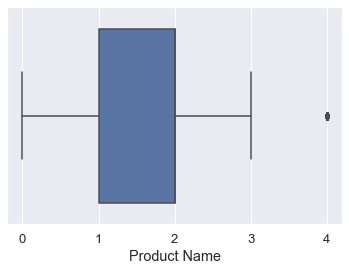

In [118]:
sns.boxplot(df['Product Name'])

As outliers are present in the data we will do impute the outliers with medians() and categorical varaible are imputed with mode().

In [119]:
df['Sales'] = df['Sales'].fillna(df['Sales'].median())

<AxesSubplot:xlabel='Sales'>

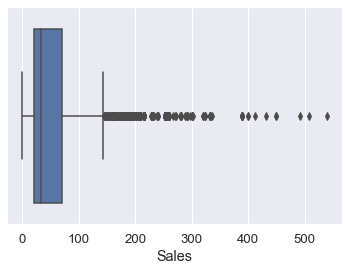

In [120]:
sns.boxplot(df['Sales'])

In [121]:
for column in df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    mode = df[column].mode()
    df[column] = df[column].fillna(mode[0])

<AxesSubplot:>

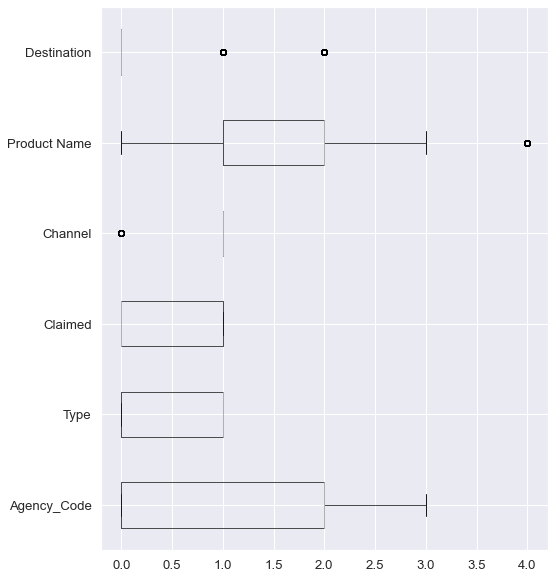

In [122]:
plt.figure(figsize=(8,10))
df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']].boxplot(vert=0)

Very small number of outliers are present, which is also not significant as it will not affect much on Predictions.

In [ ]:
#  Data Split: Split the data into test and train, build classification model CART,Random Forest and Artificial Neural Network. 

In [123]:
from sklearn.model_selection import train_test_split

Extracting the target column into separate vectors for training set and test set.

In [124]:
X=df.drop(['Claimed'],axis=1)
y=df['Claimed']
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


Splitting data into training and test set

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

Checking the dimensions of the training and test data:

In [126]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)



Building a Decision Tree Classifier

Using GridSearch Decesion Tree Model:

In [127]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [128]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

Generating Tree

In [129]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data



http://webgraphviz.com/

Variable Importance

In [130]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


Predicting on Training and Test dataset

In [131]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

Getting the Predicted Classes and Probs

In [132]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


In [ ]:
# Performance Metrics: Checking the  performance of Predictions on Train and Test sets using Accuracy,Confusion Matrix ,
# Plot ROC curve and get ROC_AUC score for each model, Write inferences on each model.

Model Evaluation

AUC and ROC for the training data

AUC: 0.810


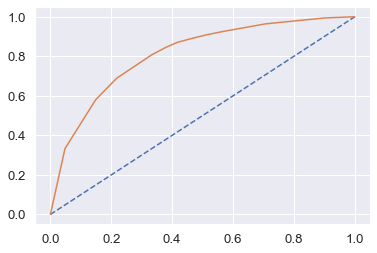

In [133]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC and ROC for the test data

AUC: 0.792


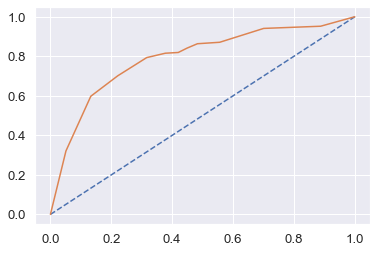

In [134]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

Confusion Matrix for the training data

In [135]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [136]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [137]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [138]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


Confusion Matrix for test data

In [139]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [140]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [141]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [142]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)



cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63



Cart Model grid search Conclusion:

Train Data:
AUC: 81%
Accuracy: 76%
Precision: 66%
f1-Score: 61%
Recall=58%

Test Data:
AUC: 79%
Accuracy: 78%
Precision: 68%
f1-Score: 63%
Recall=60%

Training and Test set results are almost similar and the model is a good model.
The test data shows reduced auc of 79% than the train data .But the accuracy score in test data is higher than train data .
Even the precesion ,recall and F1-score are increased in test data slightly.

Agency _Code and Sales are the most important variable for predicting claims.


Random Forest Model Building :
Building a Random Forest Classifier
Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher
execution time, so the best values that came after the search are directly put in Param_grid. 


Building a Random Forest Classifier

Grid Search for finding out the optimal values for the hyper parameters.Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher execution time, so the best values that came after the search are directly put in Param_grid. 

In [143]:
param_grid = {
    'max_depth': [30],## 20,30,40
    'max_features': [8],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [450] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [144]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [30], 'max_features': [8],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [450]})

In [145]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 450}

In [146]:
best_grid = grid_search.best_estimator_

In [147]:
best_grid

RandomForestClassifier(max_depth=30, max_features=8, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=450, random_state=1)

Predicting the Training and Testing data

In [148]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

RF Model Performance Evaluation on Training data

In [149]:
confusion_matrix(train_labels,ytrain_predict)

array([[1230,  129],
       [ 256,  387]], dtype=int64)

In [150]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8076923076923077

In [151]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1359
           1       0.75      0.60      0.67       643

    accuracy                           0.81      2002
   macro avg       0.79      0.75      0.77      2002
weighted avg       0.80      0.81      0.80      2002



In [152]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.75
rf_train_recall  0.6
rf_train_f1  0.67


Area under Curve is 0.8683667548982248


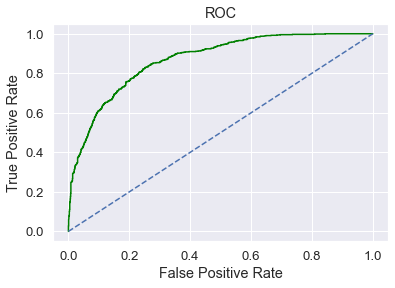

In [153]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

RF Model Performance Evaluation on Test data

In [154]:
confusion_matrix(test_labels,ytest_predict)

array([[520,  68],
       [116, 155]], dtype=int64)

In [155]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7857974388824214

In [156]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.70      0.57      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [157]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.7
rf_test_recall  0.57
rf_test_f1  0.63


Area under Curve is 0.8108573687777694


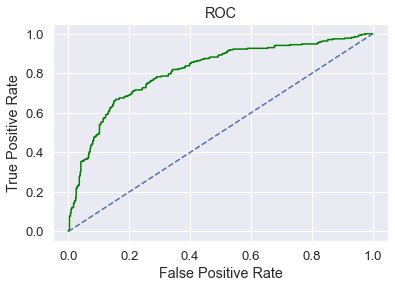

In [158]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)


In [159]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.367952
Sales         0.230091
Product Name  0.125873
Duration      0.110336
Age           0.075337
Commision     0.072405
Destination   0.014353
Type          0.001908
Channel       0.001744



Random Forest Conclusion

Train Data:
AUC: 87%
Accuracy: 81%
Precision: 75%
f1-Score: 60%
Recall:67%

Test Data:
AUC:81%
Accuracy: 79%
Precision: 75%
f1-Score: 57%
Recall:60%

Training and Test set results are almost similar, and with the overall measures are high, the model is a good model among the all.
Agency codes ,sales,product name and duration are the most important variable for predicting claims.
Though the AUc curve is 81% reduced from 87% of training data.The accuracy of test data is the highest 79% among all the model when compared with training data .
The precision ,F1-score and recall is overall a good measure.


Building a Neural Network Classifier

Feature Scaling

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
sc = StandardScaler()

In [162]:
X_train = sc.fit_transform(X_train)

In [163]:
X_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [164]:
X_test = sc.transform(X_test)

In [165]:
X_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [166]:
param_grid = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [2500,5000],
    'solver': ['adam','sgd'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [167]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [168]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

Predicting the Training and Testing data

In [169]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

NN Model Performance Evaluation on Training data

In [170]:
confusion_matrix(train_labels,ytrain_predict)

array([[1159,  200],
       [ 285,  358]], dtype=int64)

In [171]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7577422577422578

In [172]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1359
           1       0.64      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.72      0.70      0.71      2002
weighted avg       0.75      0.76      0.75      2002



In [173]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.64
nn_train_recall  0.56
nn_train_f1  0.6


Area under Curve is 0.7921265636497425


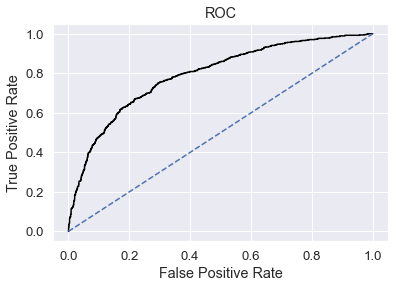

In [174]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

NN Model Performance Evaluation on Test data

In [175]:
confusion_matrix(test_labels,ytest_predict)

array([[511,  77],
       [122, 149]], dtype=int64)

In [176]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7683352735739232

In [177]:
print(classification_report(test_labels,ytest_predict))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



In [178]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)


nn_test_precision  0.66
nn_test_recall  0.55
nn_test_f1  0.6


Area under Curve is 0.7977947636619223


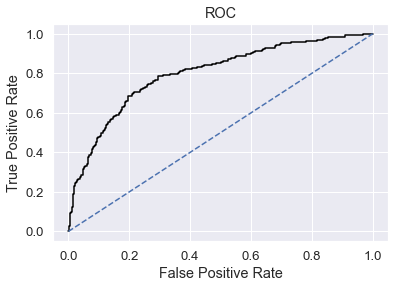

In [179]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)



Neural Network Conclusion

Compare the model performance and give the interpretations

Train Data:
AUC: 79%
Accuracy:78 %
Recall: 56%
Precision: 64%
f1-Score: 60%

Test Data:
AUC: 80%
Accuracy:77 %
Recall: 55%
Precision:66 %
f1-Score: 60%
    
The neural network model is having a test accuracy of 77% which is higher than the train data 76%.The auc curve for
test data is also increased to 80% from 79% of train data .There is sligh difference in the measures .
But the top model accuracy wise among all the three is random forest model followed by neural network and then cart model in prediction the insurance claim .


In [ ]:
#  Compare all models on the basis of the performance metrics in a structured tabular manner .
# Describe on which model is best/optimized .

Final Conclusion

Comparison of the performance metrics from the 3 models

In [180]:


index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)



,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.81,0.79,0.76,0.77
AUC,0.81,0.79,0.87,0.81,0.79,0.80
Recall,0.58,0.60,0.60,0.57,0.56,0.55
Precision,0.65,0.68,0.75,0.70,0.64,0.66
F1 Score,0.61,0.63,0.67,0.63,0.60,0.60


ROC Curve for the 3 models on the Training data¶

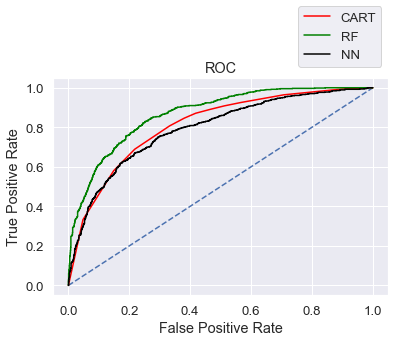

In [181]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve for the 3 models on the Test data

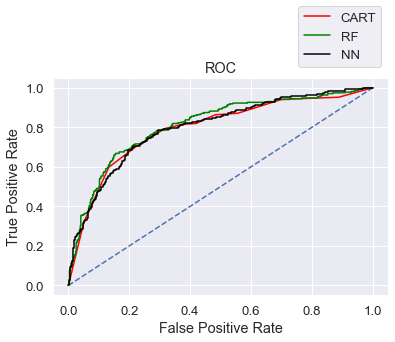

In [182]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')


In [ ]:
Conclusion:
Overall comparision shows that Random forest model has performed well on the data set of insurance .
The importnt feature on prediction is agency code and sales respectively .
